<a href="https://colab.research.google.com/github/gugupig/Multilingual_translation/blob/main/Multilingual_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1  Data set

Downloading Data

In [ ]:
import os
import sys
try:
  import wget
except:
  !pip install wget
  import wget

url ="http://www.phontron.com/data/qi18naacl-dataset.tar.gz"
%cd /content/

if not os.path.exists('/content/qi18naacl-dataset.tar.gz'):
  print('Downloading dataset')
  wget.download(url,'/content/qi18naacl-dataset.tar.gz')

if not os.path.exists('/content/datasets'):
  !tar -zxf /content/qi18naacl-dataset.tar.gz

az_path = "/content/datasets/az_to_en/"
be_path = "/content/datasets/be_to_en/"
az_data_file = [f for f in os.listdir(az_path) if f.endswith('test') or f.endswith('train') or f.endswith('dev')]
be_data_file = [f for f in os.listdir(be_path) if f.endswith('test') or f.endswith('train') or f.endswith('dev')]
az_tr_path = "/content/datasets/az_tr_to_en/"
be_ru_path = "/content/datasets/be_ru_to_en/"
az_tr_data_file = [f for f in os.listdir(az_tr_path) if f.endswith('test') or f.endswith('train') or f.endswith('dev')]
be_ru_data_file = [f for f in os.listdir(be_ru_path) if f.endswith('test') or f.endswith('train') or f.endswith('dev')]

/content


#2 Baselines


## install sentencepice and data pre-processe

In [ ]:
#INSTALL sentencepiece
try : 
  import sentencepiece as spm
except:
  % pip install sentencepiece
  import sentencepiece as spm
  
!sudo apt-get install cmake build-essential pkg-config libgoogle-perftools-dev
! git clone https://github.com/google/sentencepiece.git 
% cd sentencepiece
% mkdir build
% cd build
! cmake ..
! make -j $(nproc)
! sudo make install
! sudo ldconfig -v

## Train BPE tokenizer and use it to build corpus

In [ ]:
az_data_file = [f for f in os.listdir(az_path)]
be_data_file = [f for f in os.listdir(be_path)]
%cd {az_path}

path_az = [az_path +  datafile for datafile in az_data_file if datafile[:2] == 'az']
path_az = ','.join(path_az)
path_en = [az_path +  datafile for datafile in az_data_file if datafile[:2] == 'en']
path_en = ','.join(path_en)

! spm_train --input={path_az} --model_prefix=bpe_az --vocab_size=8000 --character_coverage=0.9995 --model_type='bpe'
! spm_train --input={path_en} --model_prefix=bpe_az_en --vocab_size=8000 --character_coverage=0.9995 --model_type='bpe'



!cp {az_path}*.model  /content/drive/MyDrive/Dataset/NMT/az
!cp {az_path}*.vocab  /content/drive/MyDrive/Dataset/NMT/az


%cd /content/

In [ ]:
%cd {be_path}

path_be = [be_path +  datafile for datafile in be_data_file if datafile[:2] == 'be']
path_be = ','.join(path_be)
path_en = [be_path +  datafile for datafile in be_data_file if datafile[:2] == 'en']
path_en = ','.join(path_en)

! spm_train --input={path_be} --model_prefix=bpe_be --vocab_size=8000 --character_coverage=0.9995 --model_type='bpe'
! spm_train --input={path_en} --model_prefix=bpe_be_en --vocab_size=8000 --character_coverage=0.9995 --model_type='bpe'



!cp {be_path}*.vocab  /content/drive/MyDrive/Dataset/NMT/be
!cp {be_path}*.model  /content/drive/MyDrive/Dataset/NMT/be



%cd /content/

In [ ]:
import sys
%cd /content/
!mkdir data
!mkdir /content/data/az-en
#!mkdir /content/data/train
#!mkdir /content/data/test
#!mkdir /content/data/dev


for data_file in az_data_file:
  input_file =  az_path+data_file
  if data_file[0:2] == 'az':
    model = az_path+'bpe_az.model'
    suffix = 'az'
  else :
    model = az_path+'bpe_az_en.model'
    suffix = 'en'
  output_file = '/content/data/az-en/'+'az.'+data_file[3:] + f'.{suffix}'

  lm = spm.SentencePieceProcessor(model_file = model)
  print(f"\n --- Now processing {data_file} --- \n")
  with open(input_file,'r',encoding='utf-8') as file1 , open(output_file,'w',encoding = 'utf-8') as file2:
    i = 0
    for line in file1.readlines():
      file2.write(" ".join(lm.encode(line,out_type = str))+'\n')
      i += 1
      sys.stdout.write('\r'+str(i)  + ' sentences added')
      sys.stdout.flush()
  !cp {output_file} /content/drive/MyDrive/Dataset/NMT/az

/content
mkdir: cannot create directory ‘data’: File exists

 --- Now processing az.train --- 

5946 sentences added
 --- Now processing az.test --- 

903 sentences added
 --- Now processing en.dev --- 

671 sentences added
 --- Now processing az.dev --- 

671 sentences added
 --- Now processing en.train --- 

5946 sentences added
 --- Now processing en.test --- 

903 sentences added

In [ ]:
!mkdir /content/data/be-en

for data_file in be_data_file:
  input_file =  be_path+data_file
  if data_file[0:2] == 'be':
    model = be_path+'bpe_be.model'
    suffix = 'be'
  else :
    model = be_path+'bpe_be_en.model'
    suffix = 'en'
  output_file = '/content/data/be-en/'+'be.'+data_file[3:] + f'.{suffix}'

  lm = spm.SentencePieceProcessor(model_file = model)
  print(f"\n --- Now processing {data_file} --- \n")
  with open(input_file,'r',encoding = 'utf-8') as file1 , open(output_file,'w',encoding = 'utf-8') as file2:
    i = 0
    for line in file1.readlines():
      file2.write(" ".join(lm.encode(line,out_type = str))+'\n')
      i += 1
      sys.stdout.write('\r'+str(i)  + ' sentences added')
      sys.stdout.flush()
  !cp {output_file} /content/drive/MyDrive/Dataset/NMT/be


 --- Now processing be.test --- 

664 sentences added
 --- Now processing be.dev --- 

248 sentences added
 --- Now processing en.dev --- 

248 sentences added
 --- Now processing be.train --- 

4509 sentences added
 --- Now processing en.train --- 

4509 sentences added
 --- Now processing en.test --- 

664 sentences added

In [ ]:
 !cp /content/drive/MyDrive/Dataset/NMT/az/* /content/data/az/
  !cp /content/drive/MyDrive/Dataset/NMT/az/* /content/data/be/

In [ ]:
!cp /content/wmt_ende_best /content/drive/MyDrive/Dataset/NMT/az/

cp: failed to access '/content/drive/MyDrive/Dataset/NMT/az/': Not a directory


In [ ]:
!rm -r wmt_ende_best

In [ ]:
!rm -r /content/data/be-en

## Install YAML

In [ ]:
try:
  import ruamel.yaml as yaml
except:
  !pip install ruamel.yaml
import ruamel.yaml as yaml

## Generate configuration files for JoeyNMT

In [ ]:
yaml_str_az_en = """name: "az-en"

data:
    src: "az"
    trg: "en"
    train: "/content/data/az-en/az.train"
    dev: "/content/data/az-en/az.dev"
    test: "/content/data/az-en/az.test"
    level: "bpe"
    lowercase: False
    max_sent_length: 100
    src_voc_min_freq: 0
    src_voc_limit: 100000
    trg_voc_min_freq: 0
    trg_voc_limit: 100000
    #src_vocab: "/content/datasets/az_to_en/bpe_az.vocab"
    #trg_vocab: "/content/datasets/az_to_en/bpe_az_en.vocab"

testing:
    beam_size: 5
    alpha: 1.0

training:
    random_seed: 42
    optimizer: "adam"
    learning_rate: 0.0002
    learning_rate_min: 0.0000005
    weight_decay: 0.0
    clip_grad_norm: 1.0
    batch_size: 4096
    batch_type: "token"
    scheduling: "plateau"
    patience: 4
    decrease_factor: 0.7
    early_stopping_metric: "eval_metric"
    epochs: 20
    validation_freq: 100
    logging_freq: 1000
    eval_metric: "bleu"
    model_dir: "az-en"
    overwrite: True
    shuffle: True
    use_cuda: True
    max_output_length: 100
    print_valid_sents: [0, 1, 2]
    keep_best_ckpts : 1

model:                              
    initializer: "xavier"           
    init_gain: 1.0                 
    bias_initializer: "zeros"       
    embed_initializer: "xavier"     
    embed_init_gain: 1.0           
    tied_embeddings: False          
    tied_softmax: True
    encoder:
        type: "transformer"          
        num_layers: 3              
        num_heads: 4                
        embeddings:
            embedding_dim: 64       
            scale: True             
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1               
        freeze: False               
    decoder:
        type: "transformer"         
        num_layers: 3               
        num_heads: 4                
        embeddings:
            embedding_dim: 64
            scale: True
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1
        freeze: False
"""

In [ ]:
yaml_str_en_az = """name: "en-az"

data:
    src: "en"
    trg: "az"
    train: "/content/data/az-en/az.train"
    dev: "/content/data/az-en/az.dev"
    test: "/content/data/az-en/az.test"
    level: "bpe"
    lowercase: False
    max_sent_length: 100
    src_voc_min_freq: 0
    src_voc_limit: 100000
    trg_voc_min_freq: 0
    trg_voc_limit: 100000
    #src_vocab: "/content/datasets/az_to_en/bpe_az_en.vocab"
    #trg_vocab: "/content/datasets/az_to_en/bpe_az.vocab"

testing:
    beam_size: 5
    alpha: 1.0

training:
    random_seed: 42
    optimizer: "adam"
    learning_rate: 0.0002
    learning_rate_min: 0.0000005
    weight_decay: 0.0
    clip_grad_norm: 1.0
    batch_size: 4096
    batch_type: "token"
    scheduling: "plateau"
    patience: 4
    decrease_factor: 0.7
    early_stopping_metric: "eval_metric"
    epochs: 20
    validation_freq: 100
    logging_freq: 1000
    eval_metric: "bleu"
    model_dir: "en-az"
    overwrite: True
    shuffle: True
    use_cuda: True
    max_output_length: 100
    print_valid_sents: [0, 1, 2]
    keep_best_ckpts : 1

model:                              
    initializer: "xavier"           
    init_gain: 1.0                 
    bias_initializer: "zeros"       
    embed_initializer: "xavier"     
    embed_init_gain: 1.0           
    tied_embeddings: False          
    tied_softmax: True
    encoder:
        type: "transformer"          
        num_layers: 3              
        num_heads: 4                
        embeddings:
            embedding_dim: 64       
            scale: True             
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1               
        freeze: False               
    decoder:
        type: "transformer"         
        num_layers: 3               
        num_heads: 4                
        embeddings:
            embedding_dim: 64
            scale: True
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1
        freeze: False
"""

In [ ]:
yaml_str_be_en = """name: "be-en"

data:
    src: "be"
    trg: "en"
    train: "/content/data/be-en/be.train"
    dev: "/content/data/be-en/be.dev"
    test: "/content/data/be-en/be.test"
    level: "bpe"
    lowercase: False
    max_sent_length: 100
    src_voc_min_freq: 0
    src_voc_limit: 100000
    trg_voc_min_freq: 0
    trg_voc_limit: 100000
    #src_vocab: "/content/dataset/be_to_en/bpe_be.vocab"
    #trg_vocab: "/content/dataset/be_to_en/bpe_be_en.vocab"

testing:
    beam_size: 5
    alpha: 1.0

training:
    random_seed: 42
    optimizer: "adam"
    learning_rate: 0.0002
    learning_rate_min: 0.0000005
    weight_decay: 0.0
    clip_grad_norm: 1.0
    batch_size: 4096
    batch_type: "token"
    scheduling: "plateau"
    patience: 4
    decrease_factor: 0.7
    early_stopping_metric: "eval_metric"
    epochs: 20
    validation_freq: 100
    logging_freq: 1000
    eval_metric: "bleu"
    model_dir: "be-en"
    overwrite: True
    shuffle: True
    use_cuda: True
    max_output_length: 100
    print_valid_sents: [0, 1, 2]
    keep_best_ckpts : 1

model:                              
    initializer: "xavier"           
    init_gain: 1.0                 
    bias_initializer: "zeros"       
    embed_initializer: "xavier"     
    embed_init_gain: 1.0           
    tied_embeddings: False          
    tied_softmax: True
    encoder:
        type: "transformer"          
        num_layers: 3              
        num_heads: 4                
        embeddings:
            embedding_dim: 64       
            scale: True             
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1               
        freeze: False               
    decoder:
        type: "transformer"         
        num_layers: 3               
        num_heads: 4                
        embeddings:
            embedding_dim: 64
            scale: True
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1
        freeze: False
"""

In [ ]:
yaml_str_en_be = """name: "en-be"

data:
    src: "en"
    trg: "be"
    train: "/content/data/be-en/be.train"
    dev: "/content/data/be-en/be.dev"
    test: "/content/data/be-en/be.test"
    level: "bpe"
    lowercase: False
    max_sent_length: 100
    src_voc_min_freq: 0
    src_voc_limit: 100000
    trg_voc_min_freq: 0
    trg_voc_limit: 100000
    #src_vocab: "/content/dataset/be_to_en/bpe_be_en.vocab"
    #trg_vocab: "/content/dataset/be_to_en/bpe_be.vocab"

testing:
    beam_size: 5
    alpha: 1.0

training:
    random_seed: 42
    optimizer: "adam"
    learning_rate: 0.0002
    learning_rate_min: 0.0000005
    weight_decay: 0.0
    clip_grad_norm: 1.0
    batch_size: 4096
    batch_type: "token"
    scheduling: "plateau"
    patience: 4
    decrease_factor: 0.7
    early_stopping_metric: "eval_metric"
    epochs: 20
    validation_freq: 100
    logging_freq: 1000
    eval_metric: "bleu"
    model_dir: "en-be"
    overwrite: True
    shuffle: True
    use_cuda: True
    max_output_length: 100
    print_valid_sents: [0, 1, 2]
    keep_best_ckpts : 1

model:                              
    initializer: "xavier"           
    init_gain: 1.0                 
    bias_initializer: "zeros"       
    embed_initializer: "xavier"     
    embed_init_gain: 1.0           
    tied_embeddings: False          
    tied_softmax: True
    encoder:
        type: "transformer"          
        num_layers: 3              
        num_heads: 4                
        embeddings:
            embedding_dim: 64       
            scale: True             
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1               
        freeze: False               
    decoder:
        type: "transformer"         
        num_layers: 3               
        num_heads: 4                
        embeddings:
            embedding_dim: 64
            scale: True
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1
        freeze: False
"""

In [ ]:
data_az_en = yaml.load(yaml_str_az_en, Loader=yaml.RoundTripLoader)
data_be_en = yaml.load(yaml_str_be_en, Loader=yaml.RoundTripLoader)
data_en_az = yaml.load(yaml_str_en_az, Loader=yaml.RoundTripLoader)
data_en_be = yaml.load(yaml_str_en_be, Loader=yaml.RoundTripLoader)

In [ ]:
with open('az-en.yaml','w') as f:
  yaml.dump(data_az_en, f,Dumper=yaml.RoundTripDumper, indent=4)
with open('be-en.yaml','w') as f:
  yaml.dump(data_be_en, f,Dumper=yaml.RoundTripDumper, indent=4)
with open('en-az.yaml','w') as f:
  yaml.dump(data_en_az, f,Dumper=yaml.RoundTripDumper, indent=4)
with open('en-be.yaml','w') as f:
  yaml.dump(data_en_be, f,Dumper=yaml.RoundTripDumper, indent=4)

## Install JoeyNMT

In [ ]:
!git clone https://github.com/joeynmt/joeynmt.git
%cd joeynmt
! pip install .
%cd /content/

## Training and Results

#### Configuration 
    

*   Model : Transformer
*   Epoch : 20
*   LR : 0.0002
*   Batch size : 4096
*   Embedding size : 64
*   Head :  4
*   Hidden size : 64
*   Hidden layers : 3


### Results    


*   AZE -> ENG :   
                  Transformer : 6.27 (test) , 8.14（dev)
                  LSTM : 2.20 (test) , 2.93 (dev)        

*   ENG -> AZE :  
                  Transformer : 1.48 (test) , 2.37（dev)
                  LSTM : 1.79 (test) , 2.38 (dev)

*   BEL -> ENG : 
                 Transformer : 3.79 (test) , 3.97 (dev)
                 LSTM : 0.93 (test) , 1.39 (dev)

*   ENG -> BEL : 
                Transformer : 1.25 (test) , 1.84 (dev)
                LSTM: 0.82 (test) , 1.09 (dev)





### Training

####  AZE TO ENG

In [ ]:
!python3 -m joeynmt train az-en.yaml

2022-01-09 22:50:47,563 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-09 22:50:47,579 - INFO - joeynmt.data - Loading training data...
2022-01-09 22:50:47,690 - INFO - joeynmt.data - Building vocabulary...
2022-01-09 22:50:48,700 - INFO - joeynmt.data - Loading dev data...
2022-01-09 22:50:48,707 - INFO - joeynmt.data - Loading test data...
2022-01-09 22:50:48,717 - INFO - joeynmt.data - Data loaded.
2022-01-09 22:50:48,717 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-09 22:50:48,747 - INFO - joeynmt.model - Enc-dec model built.
2022-01-09 22:50:50,612 - INFO - joeynmt.training - Total params: 1164288
2022-01-09 22:50:53,885 - INFO - joeynmt.helpers - cfg.name                           : az-en
2022-01-09 22:50:53,885 - INFO - joeynmt.helpers - cfg.data.src                       : az
2022-01-09 22:50:53,885 - INFO - joeynmt.helpers - cfg.data.trg                       : en
2022-01-09 22:50:53,886 - INFO - joeynmt.helpers - cfg.data.train        

##### Test

In [ ]:
!python3 -m joeynmt test /content/az-en/config.yaml --output_path /content/az-en/validation

2022-01-09 22:54:59,877 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-09 22:54:59,877 - INFO - joeynmt.data - Building vocabulary...
2022-01-09 22:55:00,603 - INFO - joeynmt.data - Loading dev data...
2022-01-09 22:55:00,610 - INFO - joeynmt.data - Loading test data...
2022-01-09 22:55:00,620 - INFO - joeynmt.data - Data loaded.
2022-01-09 22:55:00,642 - INFO - joeynmt.prediction - Process device: cuda, n_gpu: 1, batch_size per device: 4096
2022-01-09 22:55:00,642 - INFO - joeynmt.prediction - Loading model from az-en/latest.ckpt
2022-01-09 22:55:03,518 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-09 22:55:03,546 - INFO - joeynmt.model - Enc-dec model built.
2022-01-09 22:55:03,560 - INFO - joeynmt.prediction - Decoding on dev set (/content/data/az-en/az.dev.en)...
2022-01-09 22:55:25,718 - INFO - joeynmt.prediction -  dev bleu[13a]:   8.14 [Beam search decoding with beam size = 5 and alpha = 1.0]
2022-01-09 22:55:25,718 - INFO - joeynmt.predic

####  ENG TO AZE

In [ ]:
!python3 -m joeynmt train en-az.yaml

2022-01-09 22:55:57,132 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-09 22:55:57,151 - INFO - joeynmt.data - Loading training data...
2022-01-09 22:55:57,264 - INFO - joeynmt.data - Building vocabulary...
2022-01-09 22:55:58,253 - INFO - joeynmt.data - Loading dev data...
2022-01-09 22:55:58,259 - INFO - joeynmt.data - Loading test data...
2022-01-09 22:55:58,270 - INFO - joeynmt.data - Data loaded.
2022-01-09 22:55:58,270 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-09 22:55:58,301 - INFO - joeynmt.model - Enc-dec model built.
2022-01-09 22:56:00,156 - INFO - joeynmt.training - Total params: 1164288
2022-01-09 22:56:03,425 - INFO - joeynmt.helpers - cfg.name                           : en-az
2022-01-09 22:56:03,425 - INFO - joeynmt.helpers - cfg.data.src                       : en
2022-01-09 22:56:03,425 - INFO - joeynmt.helpers - cfg.data.trg                       : az
2022-01-09 22:56:03,425 - INFO - joeynmt.helpers - cfg.data.train        

##### Test

In [ ]:
!python3 -m joeynmt test /content/en-az/config.yaml --output_path /content/en-az/validation

2022-01-09 22:59:52,177 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-09 22:59:52,177 - INFO - joeynmt.data - Building vocabulary...
2022-01-09 22:59:52,892 - INFO - joeynmt.data - Loading dev data...
2022-01-09 22:59:52,900 - INFO - joeynmt.data - Loading test data...
2022-01-09 22:59:52,910 - INFO - joeynmt.data - Data loaded.
2022-01-09 22:59:52,928 - INFO - joeynmt.prediction - Process device: cuda, n_gpu: 1, batch_size per device: 4096
2022-01-09 22:59:52,929 - INFO - joeynmt.prediction - Loading model from en-az/latest.ckpt
2022-01-09 22:59:55,773 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-09 22:59:55,801 - INFO - joeynmt.model - Enc-dec model built.
2022-01-09 22:59:55,815 - INFO - joeynmt.prediction - Decoding on dev set (/content/data/az-en/az.dev.az)...
2022-01-09 23:00:05,590 - INFO - joeynmt.prediction -  dev bleu[13a]:   2.37 [Beam search decoding with beam size = 5 and alpha = 1.0]
2022-01-09 23:00:05,590 - INFO - joeynmt.predic

####  BEL TO ENG

In [ ]:
!python3 -m joeynmt train be-en.yaml

2022-01-09 23:00:22,363 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-09 23:00:22,382 - INFO - joeynmt.data - Loading training data...
2022-01-09 23:00:22,483 - INFO - joeynmt.data - Building vocabulary...
2022-01-09 23:00:23,383 - INFO - joeynmt.data - Loading dev data...
2022-01-09 23:00:23,386 - INFO - joeynmt.data - Loading test data...
2022-01-09 23:00:23,394 - INFO - joeynmt.data - Data loaded.
2022-01-09 23:00:23,394 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-09 23:00:23,430 - INFO - joeynmt.model - Enc-dec model built.
2022-01-09 23:00:25,288 - INFO - joeynmt.training - Total params: 1141824
2022-01-09 23:00:28,572 - INFO - joeynmt.helpers - cfg.name                           : be-en
2022-01-09 23:00:28,572 - INFO - joeynmt.helpers - cfg.data.src                       : be
2022-01-09 23:00:28,572 - INFO - joeynmt.helpers - cfg.data.trg                       : en
2022-01-09 23:00:28,572 - INFO - joeynmt.helpers - cfg.data.train        

##### Test

In [ ]:
!python3 -m joeynmt test /content/be-en/config.yaml --output_path /content/be-en/validation

2022-01-09 23:02:31,248 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-09 23:02:31,249 - INFO - joeynmt.data - Building vocabulary...
2022-01-09 23:02:31,937 - INFO - joeynmt.data - Loading dev data...
2022-01-09 23:02:31,941 - INFO - joeynmt.data - Loading test data...
2022-01-09 23:02:31,948 - INFO - joeynmt.data - Data loaded.
2022-01-09 23:02:31,965 - INFO - joeynmt.prediction - Process device: cuda, n_gpu: 1, batch_size per device: 4096
2022-01-09 23:02:31,965 - INFO - joeynmt.prediction - Loading model from be-en/latest.ckpt
2022-01-09 23:02:34,814 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-09 23:02:34,842 - INFO - joeynmt.model - Enc-dec model built.
2022-01-09 23:02:34,856 - INFO - joeynmt.prediction - Decoding on dev set (/content/data/be-en/be.dev.en)...
2022-01-09 23:02:40,884 - INFO - joeynmt.prediction -  dev bleu[13a]:   3.97 [Beam search decoding with beam size = 5 and alpha = 1.0]
2022-01-09 23:02:40,885 - INFO - joeynmt.predic

####  ENG TO BEL

In [ ]:
!python3 -m joeynmt train en-be.yaml

2022-01-09 23:02:58,726 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-09 23:02:58,742 - INFO - joeynmt.data - Loading training data...
2022-01-09 23:02:58,837 - INFO - joeynmt.data - Building vocabulary...
2022-01-09 23:02:59,765 - INFO - joeynmt.data - Loading dev data...
2022-01-09 23:02:59,768 - INFO - joeynmt.data - Loading test data...
2022-01-09 23:02:59,775 - INFO - joeynmt.data - Data loaded.
2022-01-09 23:02:59,776 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-09 23:02:59,805 - INFO - joeynmt.model - Enc-dec model built.
2022-01-09 23:03:01,657 - INFO - joeynmt.training - Total params: 1141824
2022-01-09 23:03:04,971 - INFO - joeynmt.helpers - cfg.name                           : en-be
2022-01-09 23:03:04,972 - INFO - joeynmt.helpers - cfg.data.src                       : en
2022-01-09 23:03:04,972 - INFO - joeynmt.helpers - cfg.data.trg                       : be
2022-01-09 23:03:04,972 - INFO - joeynmt.helpers - cfg.data.train        

##### Test

In [ ]:
!python3 -m joeynmt test /content/en-be/config.yaml --output_path /content/en-be/validation

2022-01-09 23:05:04,362 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-09 23:05:04,363 - INFO - joeynmt.data - Building vocabulary...
2022-01-09 23:05:05,043 - INFO - joeynmt.data - Loading dev data...
2022-01-09 23:05:05,046 - INFO - joeynmt.data - Loading test data...
2022-01-09 23:05:05,054 - INFO - joeynmt.data - Data loaded.
2022-01-09 23:05:05,077 - INFO - joeynmt.prediction - Process device: cuda, n_gpu: 1, batch_size per device: 4096
2022-01-09 23:05:05,077 - INFO - joeynmt.prediction - Loading model from en-be/latest.ckpt
2022-01-09 23:05:07,917 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-09 23:05:07,945 - INFO - joeynmt.model - Enc-dec model built.
2022-01-09 23:05:07,959 - INFO - joeynmt.prediction - Decoding on dev set (/content/data/be-en/be.dev.be)...
2022-01-09 23:05:12,963 - INFO - joeynmt.prediction -  dev bleu[13a]:   1.84 [Beam search decoding with beam size = 5 and alpha = 1.0]
2022-01-09 23:05:12,963 - INFO - joeynmt.predic

#3 Multilingual training

Based on the results (see below) , it's better to choose a closely related language


## With related languages

### Train multilingual BPE tokenizer and use it to build train corpus

In [ ]:
%cd {az_tr_path}
! spm_train --input=/content/datasets/az_tr_to_en/az-tr.train --model_prefix=bpe_az --vocab_size=8000 --character_coverage=0.9995 --model_type='bpe'
%cd {be_ru_path}
! spm_train --input=/content/datasets/be_ru_to_en/be-ru.train --model_prefix=bpe_az_en --vocab_size=8000 --character_coverage=0.9995 --model_type='bpe'



!cp {az_path}*.model  /content/drive/MyDrive/Dataset/NMT/az_tr
!cp {az_path}*.vocab  /content/drive/MyDrive/Dataset/NMT/be_ru


%cd /content/

/content/datasets/az_tr_to_en
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /content/datasets/az_tr_to_en/az-tr.train
  input_format: 
  model_prefix: bpe_az
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dum

In [ ]:

%cd {az_tr_path}

path_az = [az_tr_path +  datafile for datafile in az_tr_data_file if datafile[:2] == 'az']
path_az = ','.join(path_az)
path_en = [az_tr_path +  datafile for datafile in az_tr_data_file if datafile[:2] == 'en']
path_en = ','.join(path_en)

! spm_train --input={path_az} --model_prefix=bpe_az_tr --vocab_size=8000 --character_coverage=0.9995 --model_type='bpe'
! spm_train --input={path_en} --model_prefix=bpe_az_tr_en --vocab_size=8000 --character_coverage=0.9995 --model_type='bpe'







!cp {az_tr_path}*.model  /content/drive/MyDrive/Dataset/NMT/az_tr
!cp {az_tr_path}*.vocab  /content/drive/MyDrive/Dataset/NMT/az_tr


%cd /content/

/content/datasets/az_tr_to_en
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /content/datasets/az_tr_to_en/az.test
  input: /content/datasets/az_tr_to_en/az-tr.train
  input: /content/datasets/az_tr_to_en/az.dev
  input_format: 
  model_prefix: bpe_az_tr
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_

In [ ]:
%cd {be_ru_path}

path_be = [be_ru_path +  datafile for datafile in be_ru_data_file if datafile[:2] == 'be']
path_be = ','.join(path_be)
path_en = [be_ru_path +  datafile for datafile in be_ru_data_file if datafile[:2] == 'en']
path_en = ','.join(path_en)

! spm_train --input={path_be} --model_prefix=bpe_be_ru --vocab_size=8000 --character_coverage=0.9995 --model_type='bpe'
! spm_train --input={path_en} --model_prefix=bpe_be_ru_en --vocab_size=8000 --character_coverage=0.9995 --model_type='bpe'



!cp {be_ru_path}*.vocab  /content/drive/MyDrive/Dataset/NMT/be_ru
!cp {be_ru_path}*.model  /content/drive/MyDrive/Dataset/NMT/be_ru


%cd /content/

/content/datasets/be_ru_to_en
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /content/datasets/be_ru_to_en/be-ru.train
  input: /content/datasets/be_ru_to_en/be.test
  input: /content/datasets/be_ru_to_en/be.dev
  input_format: 
  model_prefix: bpe_be_ru
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_

In [ ]:

%cd /content/
!mkdir data
!mkdir /content/data/az-tr-en
!mkdir /content/data/be-ru-en



for data_file in az_tr_data_file:
  input_file =  az_tr_path+data_file
  if data_file[0:2] == 'az':
    model = az_tr_path+'bpe_az_tr.model'
    suffix = 'az'
  else :
    model = az_tr_path+'bpe_az_tr_en.model'
    suffix = 'en'
  output_file = '/content/data/az-tr-en/'+'az.tr.'+data_file[3:] + f'.{suffix}'

  lm = spm.SentencePieceProcessor(model_file = model)
  print(f"\n --- Now processing {data_file} --- \n")
  with open(input_file,'r',encoding='utf-8') as file1 , open(output_file,'w',encoding = 'utf-8') as file2:
    i = 0
    for line in file1.readlines():
      file2.write(" ".join(lm.encode(line,out_type = str))+'\n')
      i += 1
      sys.stdout.write('\r'+str(i)  + ' sentences added')
      sys.stdout.flush()

#!mv /content/data/az-tr-en/az.train.en /content/data/az-tr-en/az.tr.train.en 
!cp /content/data/az-tr-en/* /content/drive/MyDrive/Dataset/NMT/data/az-tr-en/


/content
mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘/content/data/az-tr-en’: File exists
mkdir: cannot create directory ‘/content/data/be-ru-en’: File exists

 --- Now processing az.test --- 

903 sentences added
 --- Now processing az-tr.train --- 

33791 sentences added

In [ ]:
%cd /content/
!mkdir data
!mkdir /content/data/be-ru-en



for data_file in be_ru_data_file:
  input_file =  be_ru_path+data_file
  if data_file[0:2] == 'be':
    model = be_ru_path+'bpe_be_ru.model'
    suffix = 'be'
  else :
    model = be_ru_path+'bpe_be_ru_en.model'
    suffix = 'en'
  output_file = '/content/data/be-ru-en/'+'be.ru.'+data_file[3:] + f'.{suffix}'

  lm = spm.SentencePieceProcessor(model_file = model)
  print(f"\n --- Now processing {data_file} --- \n")
  with open(input_file,'r',encoding = 'utf-8') as file1 , open(output_file,'w',encoding = 'utf-8') as file2:
    i = 0
    for line in file1.readlines():
      file2.write(" ".join(lm.encode(line,out_type = str))+'\n')
      i += 1
      sys.stdout.write('\r'+str(i)  + ' sentences added')
      sys.stdout.flush()

#!mv /content/data/be-ru-en/be.train.en /content/data/be-ru-en/be.ru.train.en 
!cp /content/data/be-ru-en/* /content/drive/MyDrive/Dataset/NMT/data/be-ru-en/

### Generate new configuration files for JoeyNMT

In [ ]:
yaml_str_az_tr_en = """name: "az-tr-en"

data:
    src: "az"
    trg: "en"
    train: "/content/data/az-tr-en/az.tr.train"
    dev: "/content/data/az-tr-en/az.tr.dev"
    test: "/content/data/az-tr-en/az.tr.test"
    level: "bpe"
    lowercase: False
    max_sent_length: 100
    src_voc_min_freq: 0
    src_voc_limit: 100000
    trg_voc_min_freq: 0
    trg_voc_limit: 100000
    #src_vocab: "/content/datasets/az_to_en/bpe_az.vocab"
    #trg_vocab: "/content/datasets/az_to_en/bpe_az_en.vocab"

testing:
    beam_size: 5
    alpha: 1.0

training:
    random_seed: 42
    optimizer: "adam"
    learning_rate: 0.0002
    learning_rate_min: 0.0000005
    weight_decay: 0.0
    clip_grad_norm: 1.0
    batch_size: 4096
    batch_type: "token"
    scheduling: "plateau"
    patience: 4
    decrease_factor: 0.7
    early_stopping_metric: "eval_metric"
    epochs: 20
    validation_freq: 1000
    logging_freq: 1000
    eval_metric: "bleu"
    model_dir: "az-tr-en"
    overwrite: True
    shuffle: True
    use_cuda: True
    max_output_length: 100
    print_valid_sents: [0, 1, 2]
    keep_best_ckpts : 1

model:                              
    initializer: "xavier"           
    init_gain: 1.0                 
    bias_initializer: "zeros"       
    embed_initializer: "xavier"     
    embed_init_gain: 1.0           
    tied_embeddings: False          
    tied_softmax: True
    encoder:
        type: "transformer"          
        num_layers: 3              
        num_heads: 4                
        embeddings:
            embedding_dim: 64       
            scale: True             
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1               
        freeze: False               
    decoder:
        type: "transformer"         
        num_layers: 3               
        num_heads: 4                
        embeddings:
            embedding_dim: 64
            scale: True
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1
        freeze: False
"""

In [ ]:
yaml_str_en_tr_az = """name: "en-tr-az"

data:
    src: "en"
    trg: "az"
    train: "/content/data/az-tr-en/az.tr.train"
    dev: "/content/data/az-tr-en/az.tr.dev"
    test: "/content/data/az-tr-en/az.tr.test"
    level: "bpe"
    lowercase: False
    max_sent_length: 100
    src_voc_min_freq: 0
    src_voc_limit: 100000
    trg_voc_min_freq: 0
    trg_voc_limit: 100000
    #src_vocab: "/content/datasets/az_to_en/bpe_az_en.vocab"
    #trg_vocab: "/content/datasets/az_to_en/bpe_az.vocab"

testing:
    beam_size: 5
    alpha: 1.0

training:
    random_seed: 42
    optimizer: "adam"
    learning_rate: 0.0002
    learning_rate_min: 0.0000005
    weight_decay: 0.0
    clip_grad_norm: 1.0
    batch_size: 4096
    batch_type: "token"
    scheduling: "plateau"
    patience: 4
    decrease_factor: 0.7
    early_stopping_metric: "eval_metric"
    epochs: 20
    validation_freq: 1000
    logging_freq: 1000
    eval_metric: "bleu"
    model_dir: "en-tr-az"
    overwrite: True
    shuffle: True
    use_cuda: True
    max_output_length: 100
    print_valid_sents: [0, 1, 2]
    keep_best_ckpts : 1

model:                              
    initializer: "xavier"           
    init_gain: 1.0                 
    bias_initializer: "zeros"       
    embed_initializer: "xavier"     
    embed_init_gain: 1.0           
    tied_embeddings: False          
    tied_softmax: True
    encoder:
        type: "transformer"          
        num_layers: 3              
        num_heads: 4                
        embeddings:
            embedding_dim: 64       
            scale: True             
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1               
        freeze: False               
    decoder:
        type: "transformer"         
        num_layers: 3               
        num_heads: 4                
        embeddings:
            embedding_dim: 64
            scale: True
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1
        freeze: False
"""

In [ ]:
yaml_str_be_ru_en = """name: "be-ru-en"

data:
    src: "be"
    trg: "en"
    train: "/content/data/be-ru-en/be.ru.train"
    dev: "/content/data/be-ru-en/be.ru.dev"
    test: "/content/data/be-ru-en/be.ru.test"
    level: "bpe"
    lowercase: False
    max_sent_length: 100
    src_voc_min_freq: 0
    src_voc_limit: 100000
    trg_voc_min_freq: 0
    trg_voc_limit: 100000
    #src_vocab: "/content/dataset/be_to_en/bpe_be.vocab"
    #trg_vocab: "/content/dataset/be_to_en/bpe_be_en.vocab"

testing:
    beam_size: 5
    alpha: 1.0

training:
    random_seed: 42
    optimizer: "adam"
    learning_rate: 0.0002
    learning_rate_min: 0.0000005
    weight_decay: 0.0
    clip_grad_norm: 1.0
    batch_size: 4096
    batch_type: "token"
    scheduling: "plateau"
    patience: 4
    decrease_factor: 0.7
    early_stopping_metric: "eval_metric"
    epochs: 20
    validation_freq: 1000
    logging_freq: 1000
    eval_metric: "bleu"
    model_dir: "be-ru-en"
    overwrite: True
    shuffle: True
    use_cuda: True
    max_output_length: 100
    print_valid_sents: [0, 1, 2]
    keep_best_ckpts : 1

model:                              
    initializer: "xavier"           
    init_gain: 1.0                 
    bias_initializer: "zeros"       
    embed_initializer: "xavier"     
    embed_init_gain: 1.0           
    tied_embeddings: False          
    tied_softmax: True
    encoder:
        type: "transformer"          
        num_layers: 3              
        num_heads: 4                
        embeddings:
            embedding_dim: 64       
            scale: True             
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1               
        freeze: False               
    decoder:
        type: "transformer"         
        num_layers: 3               
        num_heads: 4                
        embeddings:
            embedding_dim: 64
            scale: True
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1
        freeze: False
"""

In [ ]:
yaml_str_en_ru_be = """name: "en-ru-be"

data:
    src: "en"
    trg: "be"
    train: "/content/data/be-ru-en/be.ru.train"
    dev: "/content/data/be-ru-en/be.ru.dev"
    test: "/content/data/be-ru-en/be.ru.test"
    level: "bpe"
    lowercase: False
    max_sent_length: 100
    src_voc_min_freq: 0
    src_voc_limit: 100000
    trg_voc_min_freq: 0
    trg_voc_limit: 100000
    #src_vocab: "/content/dataset/be_to_en/bpe_be_en.vocab"
    #trg_vocab: "/content/dataset/be_to_en/bpe_be.vocab"

testing:
    beam_size: 5
    alpha: 1.0

training:
    random_seed: 42
    optimizer: "adam"
    learning_rate: 0.0002
    learning_rate_min: 0.0000005
    weight_decay: 0.0
    clip_grad_norm: 1.0
    batch_size: 4096
    batch_type: "token"
    scheduling: "plateau"
    patience: 4
    decrease_factor: 0.7
    early_stopping_metric: "eval_metric"
    epochs: 20
    validation_freq: 1000
    logging_freq: 1000
    eval_metric: "bleu"
    model_dir: "en-ru-be"
    overwrite: True
    shuffle: True
    use_cuda: True
    max_output_length: 100
    print_valid_sents: [0, 1, 2]
    keep_best_ckpts : 1

model:                              
    initializer: "xavier"           
    init_gain: 1.0                 
    bias_initializer: "zeros"       
    embed_initializer: "xavier"     
    embed_init_gain: 1.0           
    tied_embeddings: False          
    tied_softmax: True
    encoder:
        type: "transformer"          
        num_layers: 3              
        num_heads: 4                
        embeddings:
            embedding_dim: 64       
            scale: True             
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1               
        freeze: False               
    decoder:
        type: "transformer"         
        num_layers: 3               
        num_heads: 4                
        embeddings:
            embedding_dim: 64
            scale: True
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1
        freeze: False
"""

In [ ]:
data_az_tr_en = yaml.load(yaml_str_az_tr_en, Loader=yaml.RoundTripLoader)
data_be_ru_en = yaml.load(yaml_str_be_ru_en, Loader=yaml.RoundTripLoader)
data_en_tr_az = yaml.load(yaml_str_en_tr_az, Loader=yaml.RoundTripLoader)
data_en_ru_be = yaml.load(yaml_str_en_ru_be, Loader=yaml.RoundTripLoader)

In [ ]:
with open('az-tr-en.yaml','w') as f:
  yaml.dump(data_az_tr_en, f,Dumper=yaml.RoundTripDumper, indent=4)
with open('be-ru-en.yaml','w') as f:
  yaml.dump(data_be_ru_en, f,Dumper=yaml.RoundTripDumper, indent=4)
with open('en-tr-az.yaml','w') as f:
  yaml.dump(data_en_tr_az, f,Dumper=yaml.RoundTripDumper, indent=4)
with open('en-ru-be.yaml','w') as f:
  yaml.dump(data_en_ru_be, f,Dumper=yaml.RoundTripDumper, indent=4)

#### Training and results

##### Configuration 
    

*   Model : Transformer
*   Epoch : 20
*   LR : 0.0002
*   Batch size : 4096
*   Embedding size : 64
*   Head :  4
*   Hidden size : 64
*   Hidden layers : 3









#####  Results   


*   AZE+TUR -> ENG : 13.75 (test) , 17.91 (dev)
*   ENG -> AZE+TUR : 4.17 (test) , 5.98  (dev)

*   BEL+RUS -> ENG : 11.76 (test) , 13.49 (dev)
*   ENG -> BEL+RUS : 2.98 (test) ,  4.04 (dev)





##### Training

######  AZE+TUR TO ENG

In [ ]:
!python3 -m joeynmt train az-tr-en.yaml

###### Test


In [ ]:
!python3 -m joeynmt test /content/az-tr-en/config.yaml --output_path /content/az-tr-en/validation

###### ENG TO AZE+TUR

In [ ]:
!python3 -m joeynmt train en-tr-az.yaml

###### Test

In [ ]:
!python3 -m joeynmt test /content/en-tr-az/config.yaml --output_path /content/en-tr-az/validation

###### BEL+RUS TO ENG

In [ ]:
!python3 -m joeynmt train be-ru-en.yaml

###### Test

In [ ]:
!python3 -m joeynmt test /content/be-ru-en/config.yaml --output_path /content/be-ru-en/validation

###### ENG TO BEL+RUS

In [ ]:
!python3 -m joeynmt train en-ru-be.yaml

###### Test

In [ ]:
!python3 -m joeynmt test /content/en-ru-be/config.yaml --output_path /content/en-ru-be/validation

## With unrelated language (RUS)

###  Train multilingual BPE tokenizer and use it to build train corpus

#### Concatenate 1883396 sentences (size of TUR train) from RUS train to the AZE train

In [ ]:
!cp -av /content/datasets/az_to_en/ /content/datasets/az_ru_to_en/
path_az = "/content/datasets/az_ru_to_en/az.train"
path_az_en = "/content/datasets/az_ru_to_en/en.train"
path_ru = "/content/datasets/ru_to_en/ru.train"
path_ru_en = "/content/datasets/ru_to_en/en.train"

tr_max_length = 188396
i = 0
with open(path_az,'a',encoding ='utf-8') as file1 ,open(path_ru,'r',encoding = 'utf-8') as file2:
  for line in file2.readlines():
    file1.write(line)
    i += 1
    sys.stdout.write('\r'+str(i)  + ' sentences added')
    sys.stdout.flush()
    if i == tr_max_length:
      break

i = 0
with open(path_az_en,'a',encoding ='utf-8') as file1 ,open(path_ru_en,'r',encoding = 'utf-8') as file2:
  for line in file2.readlines():
    file1.write(line)
    i += 1
    sys.stdout.write('\r'+str(i)  + ' sentences added')
    sys.stdout.flush()
    if i == tr_max_length:
      break


'/content/datasets/az_to_en/' -> '/content/datasets/az_ru_to_en/'
'/content/datasets/az_to_en/en.train' -> '/content/datasets/az_ru_to_en/en.train'
'/content/datasets/az_to_en/az.test' -> '/content/datasets/az_ru_to_en/az.test'
'/content/datasets/az_to_en/az.train' -> '/content/datasets/az_ru_to_en/az.train'
'/content/datasets/az_to_en/en.dev' -> '/content/datasets/az_ru_to_en/en.dev'
'/content/datasets/az_to_en/az.dev' -> '/content/datasets/az_ru_to_en/az.dev'
'/content/datasets/az_to_en/en.test' -> '/content/datasets/az_ru_to_en/en.test'
188396 sentences added

In [ ]:
path_ru_en

'/content/datasets/ru_to_en/en.train'

In [ ]:
!cp -av /content/datasets/az_to_en/en.train /content/datasets/az_ru_to_en/

'/content/datasets/az_to_en/en.train' -> '/content/datasets/az_ru_to_en/en.train'


In [ ]:
i = 0
with open(path_az_en,'a',encoding ='utf-8') as file1 ,open(path_ru_en,'r',encoding = 'utf-8') as file2:
  for line in file2.readlines():
    file1.write(line)
    i += 1
    sys.stdout.write('\r'+str(i)  + ' sentences added')
    sys.stdout.flush()
    if i == tr_max_length:
      break

188396 sentences added

In [ ]:
!rm -r /content/datasets/az_ru_to_en

In [ ]:
az_ru_path = "/content/datasets/az_ru_to_en/"
az_ru_data_file = [f for f in os.listdir(az_ru_path) if f.endswith('test') or f.endswith('train') or f.endswith('dev')]
%cd {az_ru_path}

path_az = [az_ru_path +  datafile for datafile in az_ru_data_file if datafile[:2] == 'az']
path_az = ','.join(path_az)
path_en = [az_ru_path +  datafile for datafile in az_ru_data_file if datafile[:2] == 'en']
path_en = ','.join(path_en)

! spm_train --input={path_az} --model_prefix=bpe_az_ru --vocab_size=8000 --character_coverage=0.9995 --model_type='bpe'
! spm_train --input={path_en} --model_prefix=bpe_az_ru_en --vocab_size=8000 --character_coverage=0.9995 --model_type='bpe'







!cp {az_ru_path}*.model  /content/drive/MyDrive/Dataset/NMT/az_ru
!cp {az_ru_path}*.vocab  /content/drive/MyDrive/Dataset/NMT/az_ru


%cd /content/

/content/datasets/az_ru_to_en
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /content/datasets/az_ru_to_en/az.train
  input: /content/datasets/az_ru_to_en/az.test
  input: /content/datasets/az_ru_to_en/az.dev
  input_format: 
  model_prefix: bpe_az_ru
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_pie

In [ ]:
%cd /content/
!mkdir data
!mkdir /content/data/az-ru-en



for data_file in az_ru_data_file:
  input_file =  az_ru_path+data_file
  if data_file[0:2] == 'az':
    model = az_ru_path+'bpe_az_ru.model'
    suffix = 'az'
  else :
    model = az_ru_path+'bpe_az_ru_en.model'
    suffix = 'en'
  output_file = '/content/data/az-ru-en/'+'az.ru.'+data_file[3:] + f'.{suffix}'

  lm = spm.SentencePieceProcessor(model_file = model)
  print(f"\n --- Now processing {data_file} --- \n")
  with open(input_file,'r',encoding='utf-8') as file1 , open(output_file,'w',encoding = 'utf-8') as file2:
    i = 0
    for line in file1.readlines():
      file2.write(" ".join(lm.encode(line,out_type = str))+'\n')
      i += 1
      sys.stdout.write('\r'+str(i)  + ' sentences added')
      sys.stdout.flush()


!cp /content/data/az-ru-en/* /content/drive/MyDrive/Dataset/NMT/data/az-ru-en/


/content
mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘/content/data/az-ru-en’: File exists

 --- Now processing az.train --- 

194342 sentences added
 --- Now processing az.test --- 

903 sentences added
 --- Now processing en.dev --- 

671 sentences added
 --- Now processing az.dev --- 

671 sentences added
 --- Now processing en.train --- 

194342 sentences added
 --- Now processing en.test --- 

903 sentences added

### Generate configuration files for JoeyNMT

In [ ]:
yaml_str_az_ru_en = """name: "az-ru-en"

data:
    src: "az"
    trg: "en"
    train: "/content/data/az-ru-en/az.ru.train"
    dev: "/content/data/az-ru-en/az.ru.dev"
    test: "/content/data/az-ru-en/az.ru.test"
    level: "bpe"
    lowercase: False
    max_sent_length: 100
    src_voc_min_freq: 0
    src_voc_limit: 100000
    trg_voc_min_freq: 0
    trg_voc_limit: 100000
    #src_vocab: "/content/datasets/az_to_en/bpe_az.vocab"
    #trg_vocab: "/content/datasets/az_to_en/bpe_az_en.vocab"

testing:
    beam_size: 5
    alpha: 1.0

training:
    random_seed: 42
    optimizer: "adam"
    learning_rate: 0.0002
    learning_rate_min: 0.0000005
    weight_decay: 0.0
    clip_grad_norm: 1.0
    batch_size: 4096
    batch_type: "token"
    scheduling: "plateau"
    patience: 4
    decrease_factor: 0.7
    early_stopping_metric: "eval_metric"
    epochs: 15
    validation_freq: 1000
    logging_freq: 1000
    eval_metric: "bleu"
    model_dir: "az-ru-en"
    overwrite: True
    shuffle: True
    use_cuda: True
    max_output_length: 100
    print_valid_sents: [0, 1, 2]
    keep_best_ckpts : 1

model:                              
    initializer: "xavier"           
    init_gain: 1.0                 
    bias_initializer: "zeros"       
    embed_initializer: "xavier"     
    embed_init_gain: 1.0           
    tied_embeddings: False          
    tied_softmax: True
    encoder:
        type: "transformer"          
        num_layers: 3              
        num_heads: 4                
        embeddings:
            embedding_dim: 64       
            scale: True             
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1               
        freeze: False               
    decoder:
        type: "transformer"         
        num_layers: 3               
        num_heads: 4                
        embeddings:
            embedding_dim: 64
            scale: True
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1
        freeze: False
"""

In [ ]:
yaml_str_en_ru_az = """name: "en-ru-az"

data:
    src: "en"
    trg: "az"
    train: "/content/data/az-ru-en/az.ru.train"
    dev: "/content/data/az-ru-en/az.ru.dev"
    test: "/content/data/az-ru-en/az.ru.test"
    level: "bpe"
    lowercase: False
    max_sent_length: 100
    src_voc_min_freq: 0
    src_voc_limit: 100000
    trg_voc_min_freq: 0
    trg_voc_limit: 100000
    #src_vocab: "/content/datasets/az_to_en/bpe_az_en.vocab"
    #trg_vocab: "/content/datasets/az_to_en/bpe_az.vocab"

testing:
    beam_size: 5
    alpha: 1.0

training:
    random_seed: 42
    optimizer: "adam"
    learning_rate: 0.0002
    learning_rate_min: 0.0000005
    weight_decay: 0.0
    clip_grad_norm: 1.0
    batch_size: 4096
    batch_type: "token"
    scheduling: "plateau"
    patience: 4
    decrease_factor: 0.7
    early_stopping_metric: "eval_metric"
    epochs: 15
    validation_freq: 1000
    logging_freq: 1000
    eval_metric: "bleu"
    model_dir: "en-ru-az"
    overwrite: True
    shuffle: True
    use_cuda: True
    max_output_length: 100
    print_valid_sents: [0, 1, 2]
    keep_best_ckpts : 1

model:                              
    initializer: "xavier"           
    init_gain: 1.0                 
    bias_initializer: "zeros"       
    embed_initializer: "xavier"     
    embed_init_gain: 1.0           
    tied_embeddings: False          
    tied_softmax: True
    encoder:
        type: "transformer"          
        num_layers: 3              
        num_heads: 4                
        embeddings:
            embedding_dim: 64       
            scale: True             
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1               
        freeze: False               
    decoder:
        type: "transformer"         
        num_layers: 3               
        num_heads: 4                
        embeddings:
            embedding_dim: 64
            scale: True
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1
        freeze: False
"""

In [ ]:
data_az_ru_en = yaml.load(yaml_str_az_ru_en, Loader=yaml.RoundTripLoader)
data_en_ru_az = yaml.load(yaml_str_en_ru_az, Loader=yaml.RoundTripLoader)
with open('az_ru_en.yaml','w') as f:
  yaml.dump(data_az_ru_en, f,Dumper=yaml.RoundTripDumper, indent=4)
with open('en_ru_az.yaml','w') as f:
  yaml.dump(data_en_ru_az, f,Dumper=yaml.RoundTripDumper, indent=4)

### Training and results

In [ ]:
!python3 -m joeynmt train be-ru-en_trans.yaml

##### Configuration 
    

*   Model : Transformer
*   Epoch : 20
*   LR : 0.0002
*   Batch size : 4096
*   Embedding size : 64
*   Head :  4
*   Hidden size : 64
*   Hidden layers : 3









#####  Results   


*   AZE+RUS -> ENG : 8.23 (test) , 11.23 (dev)
*   ENG -> AZE+RUS : 2.24 (test) , 3.58 (dev)




#####  Training 

######  AZE+RUS -> ENG  




In [ ]:
!python3 -m joeynmt train az_ru_en.yaml

2022-01-09 20:58:45,847 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-09 20:58:45,863 - INFO - joeynmt.data - Loading training data...
2022-01-09 20:58:49,933 - INFO - joeynmt.data - Building vocabulary...
2022-01-09 20:58:53,398 - INFO - joeynmt.data - Loading dev data...
2022-01-09 20:58:53,408 - INFO - joeynmt.data - Loading test data...
2022-01-09 20:58:53,420 - INFO - joeynmt.data - Data loaded.
2022-01-09 20:58:53,421 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-09 20:58:53,452 - INFO - joeynmt.model - Enc-dec model built.
2022-01-09 20:58:55,719 - INFO - joeynmt.training - Total params: 1278656
2022-01-09 20:58:59,037 - INFO - joeynmt.helpers - cfg.name                           : az-ru-en
2022-01-09 20:58:59,038 - INFO - joeynmt.helpers - cfg.data.src                       : az
2022-01-09 20:58:59,038 - INFO - joeynmt.helpers - cfg.data.trg                       : en
2022-01-09 20:58:59,038 - INFO - joeynmt.helpers - cfg.data.train     

######  Test

In [ ]:
!python3 -m joeynmt test /content/az-ru-en/config.yaml --output_path /content/az-ru-en/validation

2022-01-09 21:50:59,950 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-09 21:50:59,951 - INFO - joeynmt.data - Building vocabulary...
2022-01-09 21:51:00,879 - INFO - joeynmt.data - Loading dev data...
2022-01-09 21:51:00,887 - INFO - joeynmt.data - Loading test data...
2022-01-09 21:51:00,898 - INFO - joeynmt.data - Data loaded.
2022-01-09 21:51:00,919 - INFO - joeynmt.prediction - Process device: cuda, n_gpu: 1, batch_size per device: 4096
2022-01-09 21:51:00,919 - INFO - joeynmt.prediction - Loading model from az-ru-en/latest.ckpt
2022-01-09 21:51:03,806 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-09 21:51:03,836 - INFO - joeynmt.model - Enc-dec model built.
2022-01-09 21:51:03,850 - INFO - joeynmt.prediction - Decoding on dev set (/content/data/az-ru-en/az.ru.dev.en)...
2022-01-09 21:51:16,661 - INFO - joeynmt.prediction -  dev bleu[13a]:  11.21 [Beam search decoding with beam size = 5 and alpha = 1.0]
2022-01-09 21:51:16,662 - INFO - joeyn

######  ENG -> AZE+RUS  

In [ ]:
!python3 -m joeynmt train en_ru_az.yaml

2022-01-09 21:52:27,622 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-09 21:52:27,641 - INFO - joeynmt.data - Loading training data...
2022-01-09 21:52:31,723 - INFO - joeynmt.data - Building vocabulary...
2022-01-09 21:52:35,301 - INFO - joeynmt.data - Loading dev data...
2022-01-09 21:52:35,308 - INFO - joeynmt.data - Loading test data...
2022-01-09 21:52:35,317 - INFO - joeynmt.data - Data loaded.
2022-01-09 21:52:35,317 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-09 21:52:35,349 - INFO - joeynmt.model - Enc-dec model built.
2022-01-09 21:52:37,632 - INFO - joeynmt.training - Total params: 1278656
2022-01-09 21:52:40,872 - INFO - joeynmt.helpers - cfg.name                           : en-ru-az
2022-01-09 21:52:40,872 - INFO - joeynmt.helpers - cfg.data.src                       : en
2022-01-09 21:52:40,872 - INFO - joeynmt.helpers - cfg.data.trg                       : az
2022-01-09 21:52:40,872 - INFO - joeynmt.helpers - cfg.data.train     

######  Test

In [ ]:
!python3 -m joeynmt test /content/en-ru-az/config.yaml --output_path /content/en-ru-az/validation

2022-01-09 22:38:21,377 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-09 22:38:21,378 - INFO - joeynmt.data - Building vocabulary...
2022-01-09 22:38:22,303 - INFO - joeynmt.data - Loading dev data...
2022-01-09 22:38:22,310 - INFO - joeynmt.data - Loading test data...
2022-01-09 22:38:22,322 - INFO - joeynmt.data - Data loaded.
2022-01-09 22:38:22,341 - INFO - joeynmt.prediction - Process device: cuda, n_gpu: 1, batch_size per device: 4096
2022-01-09 22:38:22,341 - INFO - joeynmt.prediction - Loading model from en-ru-az/latest.ckpt
2022-01-09 22:38:25,158 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-09 22:38:25,190 - INFO - joeynmt.model - Enc-dec model built.
2022-01-09 22:38:25,204 - INFO - joeynmt.prediction - Decoding on dev set (/content/data/az-ru-en/az.ru.dev.az)...
2022-01-09 22:38:32,988 - INFO - joeynmt.prediction -  dev bleu[13a]:   3.58 [Beam search decoding with beam size = 5 and alpha = 1.0]
2022-01-09 22:38:32,989 - INFO - joeyn

#4 Improving Multilingual Translation

To study the impact of the vocabulary size in the low-resource scenario, I tokenize the Azerbaijani corpus (train, dev, test) with 500,1k,2k,4k,8k,16k and 26k sub-word tokens.

Each new corpus is used to train a Transformer using the same configuration

The tokenizer is trained separately on the source and the target corpus

The results (see below) show that the optimal vocabulary size for AZE to ENG translation (and this particular configuration) is 8k, despite some odd datapoints (Possibly due to randomness of initial values). in general, the BLEU score increases with the vocabulary size before 8k and decrease as the vocabulary goes up after 8k


## Train 6 BPE tokenizers with diminishing vocabulary size

Vocabulary size : 26660,16000,8000,4000,2000,1000,500

In [ ]:

%cd {az_path}

path_az = [az_path +  datafile for datafile in az_data_file if datafile[:2] == 'az']
path_az = ','.join(path_az)
path_en = [az_path +  datafile for datafile in az_data_file if datafile[:2] == 'en']
path_en = ','.join(path_en)



! spm_train --input={path_az} --model_prefix=bpe_az_16000 --vocab_size=16000 --character_coverage=0.9995 --model_type='bpe'
! spm_train --input={path_en} --model_prefix=bpe_az_en_16000 --vocab_size=16000 --character_coverage=0.9995 --model_type='bpe'

! spm_train --input={path_az} --model_prefix=bpe_az_4000 --vocab_size=4000 --character_coverage=0.9995 --model_type='bpe'
! spm_train --input={path_en} --model_prefix=bpe_az_en_4000 --vocab_size=4000 --character_coverage=0.9995 --model_type='bpe'

! spm_train --input={path_az} --model_prefix=bpe_az_2000 --vocab_size=2000 --character_coverage=0.9995 --model_type='bpe'
! spm_train --input={path_en} --model_prefix=bpe_az_en_2000 --vocab_size=2000 --character_coverage=0.9995 --model_type='bpe'



! spm_train --input={path_az} --model_prefix=bpe_az_1000 --vocab_size=1000 --character_coverage=0.9995 --model_type='bpe'
! spm_train --input={path_en} --model_prefix=bpe_az_en_1000 --vocab_size=1000 --character_coverage=0.9995 --model_type='bpe'

! spm_train --input={path_az} --model_prefix=bpe_az_500 --vocab_size=500 --character_coverage=0.9995 --model_type='bpe'
! spm_train --input={path_en} --model_prefix=bpe_az_en_500 --vocab_size=500 --character_coverage=0.9995 --model_type='bpe'



! spm_train --input={path_az} --model_prefix=bpe_az_26660 --vocab_size=26660 --character_coverage=0.9995 --model_type='bpe'
! spm_train --input={path_en} --model_prefix=bpe_az_en_26660 --vocab_size=26660 --character_coverage=0.9995 --model_type='bpe'

!cp {az_path}*.model  /content/drive/MyDrive/Dataset/NMT/az
!cp {az_path}*.vocab  /content/drive/MyDrive/Dataset/NMT/az


%cd /content/

## Build 6 training coprus with diminishing vocabulary sizes

In [ ]:

%cd /content/
!mkdir data
!mkdir /content/data/az-en
#!mkdir /content/data/train
#!mkdir /content/data/test
#!mkdir /content/data/dev

vocab_size = ['500','1000','2000','4000','16000','26660']
#vocab_size_ = ['500','26660']

for size in vocab_size:
  for data_file in az_data_file:
    input_file =  az_path+data_file
    if data_file[0:2] == 'az':
      model = az_path+'bpe_az_'+size+'.model'
      suffix = 'az'
    else :
      model = az_path+'bpe_az_en_'+size+'.model'
      suffix = 'en'
    output_file = '/content/data/az-en/'+size+'.az.'+data_file[3:] + f'.{suffix}'

    lm = spm.SentencePieceProcessor(model_file = model)
    print(f"\n --- Now processing {data_file} --- \n")
    with open(input_file,'r',encoding='utf-8') as file1 , open(output_file,'w',encoding = 'utf-8') as file2:
      i = 0
      for line in file1.readlines():
        file2.write(" ".join(lm.encode(line,out_type = str))+'\n')
        i += 1
        sys.stdout.write('\r'+str(i)  + ' sentences added')
        sys.stdout.flush()
    !cp {output_file} /content/drive/MyDrive/Dataset/NMT/az

## Generate configuration files for JoeyNMT

In [ ]:
yaml_str_az_en_var = """name: "az-en-var"

data:
    src: "az"
    trg: "en"
    train: "/content/data/az-en/az.train"
    dev: "/content/data/az-en/az.dev"
    test: "/content/data/az-en/az.test"
    level: "bpe"
    lowercase: False
    max_sent_length: 100
    src_voc_min_freq: 0
    src_voc_limit: 100000
    trg_voc_min_freq: 0
    trg_voc_limit: 100000
    #src_vocab: "/content/datasets/az_to_en/bpe_az.vocab"
    #trg_vocab: "/content/datasets/az_to_en/bpe_az_en.vocab"

testing:
    beam_size: 5
    alpha: 1.0

training:
    random_seed: 42
    optimizer: "adam"
    learning_rate: 0.0002
    learning_rate_min: 0.0000005
    weight_decay: 0.0
    clip_grad_norm: 1.0
    batch_size: 4096
    batch_type: "token"
    scheduling: "plateau"
    patience: 4
    decrease_factor: 0.7
    early_stopping_metric: "eval_metric"
    epochs: 20
    validation_freq: 100
    logging_freq: 1000
    eval_metric: "bleu"
    model_dir: "az-en"
    overwrite: True
    shuffle: True
    use_cuda: True
    max_output_length: 100
    print_valid_sents: [0, 1, 2]
    keep_best_ckpts : 1

model:                              
    initializer: "xavier"           
    init_gain: 1.0                 
    bias_initializer: "zeros"       
    embed_initializer: "xavier"     
    embed_init_gain: 1.0           
    tied_embeddings: False          
    tied_softmax: True
    encoder:
        type: "transformer"          
        num_layers: 3              
        num_heads: 4                
        embeddings:
            embedding_dim: 64       
            scale: True             
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1               
        freeze: False               
    decoder:
        type: "transformer"         
        num_layers: 3               
        num_heads: 4                
        embeddings:
            embedding_dim: 64
            scale: True
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1
        freeze: False
"""
yaml_str_en_az_var = """name: "en-az-var"

data:
    src: "en"
    trg: "az"
    train: "/content/data/az-en/az.train"
    dev: "/content/data/az-en/az.dev"
    test: "/content/data/az-en/az.test"
    level: "bpe"
    lowercase: False
    max_sent_length: 100
    src_voc_min_freq: 0
    src_voc_limit: 100000
    trg_voc_min_freq: 0
    trg_voc_limit: 100000
    #src_vocab: "/content/datasets/az_to_en/bpe_az.vocab"
    #trg_vocab: "/content/datasets/az_to_en/bpe_az_en.vocab"

testing:
    beam_size: 5
    alpha: 1.0

training:
    random_seed: 42
    optimizer: "adam"
    learning_rate: 0.0002
    learning_rate_min: 0.0000005
    weight_decay: 0.0
    clip_grad_norm: 1.0
    batch_size: 4096
    batch_type: "token"
    scheduling: "plateau"
    patience: 4
    decrease_factor: 0.7
    early_stopping_metric: "eval_metric"
    epochs: 20
    validation_freq: 100
    logging_freq: 1000
    eval_metric: "bleu"
    model_dir: "en-az"
    overwrite: True
    shuffle: True
    use_cuda: True
    max_output_length: 100
    print_valid_sents: [0, 1, 2]
    keep_best_ckpts : 1

model:                              
    initializer: "xavier"           
    init_gain: 1.0                 
    bias_initializer: "zeros"       
    embed_initializer: "xavier"     
    embed_init_gain: 1.0           
    tied_embeddings: False          
    tied_softmax: True
    encoder:
        type: "transformer"          
        num_layers: 3              
        num_heads: 4                
        embeddings:
            embedding_dim: 64       
            scale: True             
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1               
        freeze: False               
    decoder:
        type: "transformer"         
        num_layers: 3               
        num_heads: 4                
        embeddings:
            embedding_dim: 64
            scale: True
            freeze: False           
        hidden_size: 64             
        ff_size: 128                
        dropout: 0.1
        freeze: False
"""

In [ ]:
data_az_en_var = yaml.load(yaml_str_az_en_var, Loader=yaml.RoundTripLoader)
for size in vocab_size:
    data_az_en_var['name'] = f'{size}-az-en'
    data_az_en_var['data']['train'] = f'/content/data/az-en/{size}.az.train'
    data_az_en_var['data']['dev'] = f'/content/data/az-en/{size}.az.dev'
    data_az_en_var['data']['test'] = f'/content/data/az-en/{size}.az.test'
    data_az_en_var['training']['model_dir'] = f'{size}-az-en'
    with open(f'{size}-az-en.yaml','w') as f:
      yaml.dump(data_az_en_var, f,Dumper=yaml.RoundTripDumper, indent=4)

data_en_az_var = yaml.load(yaml_str_en_az_var, Loader=yaml.RoundTripLoader)
for size in vocab_size:
    data_en_az_var['name'] = f'{size}-az-en'
    data_en_az_var['data']['train'] = f'/content/data/az-en/{size}.az.train'
    data_en_az_var['data']['dev'] = f'/content/data/az-en/{size}.az.dev'
    data_en_az_var['data']['test'] = f'/content/data/az-en/{size}.az.test'
    data_en_az_var['training']['model_dir'] = f'{size}-en-az'
    with open(f'{size}-en-az.yaml','w') as f:
      yaml.dump(data_en_az_var, f,Dumper=yaml.RoundTripDumper, indent=4)

## Traininng 6 NMT

### Configuration 
    

*   Model : Transformer
*   Epoch : 20
*   LR : 0.0002
*   Batch size : 4096
*   Embedding size : 64
*   Head :  4
*   Hidden size : 64
*   Hidden layers : 3


###  Results 



**AZE - > ENG**
*   500 : 4.44 (test) , 6.06 (dev)
*   1000 : 5.08 (test) , 7.17 (dev)
*   2000 : 5.65 (test) , 6.95 (dev)
*   4000 : 5.37 (test) , 7.10 (dev)
*   8000 : 6.27 (test) , 8.14（dev)
*   16000 : 5.65 (test) , 7.53 (dev)
*   26660 : 5.43 (test) , 7.05 (dev)


**ENG - > AZE**
*   500 : 2.24 (test) , 3.53 (dev)
*   1000 : 1.16 (test) , 1.81 (dev)
*   2000 : 1.64 (test) , 2.62 (dev)
*   4000 : 1.67 (test) , 2.69 (dev)
*   8000 : 1.48 (test) , 2.37（dev)
*   16000 : 2.45 (test) , 3.82 (dev)
*   26660 : 1.83 (test) , 2.94 (dev)




### Training 

#### AZE - > ENG

In [ ]:
for size in vocab_size:
  !python3 -m joeynmt train {size}-az-en.yaml

2022-01-10 00:14:50,500 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-10 00:14:50,523 - INFO - joeynmt.data - Loading training data...
2022-01-10 00:14:50,649 - INFO - joeynmt.data - Building vocabulary...
2022-01-10 00:14:50,714 - INFO - joeynmt.data - Loading dev data...
2022-01-10 00:14:50,721 - INFO - joeynmt.data - Loading test data...
2022-01-10 00:14:50,734 - INFO - joeynmt.data - Data loaded.
2022-01-10 00:14:50,734 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-10 00:14:50,756 - INFO - joeynmt.model - Enc-dec model built.
2022-01-10 00:14:52,634 - INFO - joeynmt.training - Total params: 380160
2022-01-10 00:14:55,904 - INFO - joeynmt.helpers - cfg.name                           : 1000-az-en
2022-01-10 00:14:55,904 - INFO - joeynmt.helpers - cfg.data.src                       : az
2022-01-10 00:14:55,904 - INFO - joeynmt.helpers - cfg.data.trg                       : en
2022-01-10 00:14:55,904 - INFO - joeynmt.helpers - cfg.data.train    

In [ ]:
#for size in vocab_size_:
 # !python3 -m joeynmt train {size}-az-en.yaml

2022-01-10 01:33:24,426 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-10 01:33:24,445 - INFO - joeynmt.data - Loading training data...
2022-01-10 01:33:24,577 - INFO - joeynmt.data - Building vocabulary...
2022-01-10 01:33:24,631 - INFO - joeynmt.data - Loading dev data...
2022-01-10 01:33:24,637 - INFO - joeynmt.data - Loading test data...
2022-01-10 01:33:24,651 - INFO - joeynmt.data - Data loaded.
2022-01-10 01:33:24,652 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-10 01:33:24,668 - INFO - joeynmt.model - Enc-dec model built.
2022-01-10 01:33:26,569 - INFO - joeynmt.training - Total params: 316864
2022-01-10 01:33:29,844 - INFO - joeynmt.helpers - cfg.name                           : 500-az-en
2022-01-10 01:33:29,844 - INFO - joeynmt.helpers - cfg.data.src                       : az
2022-01-10 01:33:29,844 - INFO - joeynmt.helpers - cfg.data.trg                       : en
2022-01-10 01:33:29,844 - INFO - joeynmt.helpers - cfg.data.train     

#### Test

In [ ]:
for size in vocab_size:
  print(f'Now Testing {size}')
  !python3 -m joeynmt test /content/{size}-az-en/config.yaml --output_path /content/{size}-az-en/validation

Now Testing 1000
2022-01-10 01:14:25,739 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-10 01:14:25,739 - INFO - joeynmt.data - Building vocabulary...
2022-01-10 01:14:25,755 - INFO - joeynmt.data - Loading dev data...
2022-01-10 01:14:25,762 - INFO - joeynmt.data - Loading test data...
2022-01-10 01:14:25,774 - INFO - joeynmt.data - Data loaded.
2022-01-10 01:14:25,792 - INFO - joeynmt.prediction - Process device: cuda, n_gpu: 1, batch_size per device: 4096
2022-01-10 01:14:25,792 - INFO - joeynmt.prediction - Loading model from 1000-az-en/latest.ckpt
2022-01-10 01:14:28,628 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-10 01:14:28,644 - INFO - joeynmt.model - Enc-dec model built.
2022-01-10 01:14:28,656 - INFO - joeynmt.prediction - Decoding on dev set (/content/data/az-en/1000.az.dev.en)...
2022-01-10 01:14:50,969 - INFO - joeynmt.prediction -  dev bleu[13a]:   7.17 [Beam search decoding with beam size = 5 and alpha = 1.0]
2022-01-10 01:14:50,

In [ ]:
#for size in vocab_size_:
  #print(f'Now Testing {size}')
  #!python3 -m joeynmt test /content/{size}-az-en/config.yaml --output_path /content/{size}-az-en/validation

Now Testing 500
2022-01-10 01:43:13,206 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-10 01:43:13,207 - INFO - joeynmt.data - Building vocabulary...
2022-01-10 01:43:13,211 - INFO - joeynmt.data - Loading dev data...
2022-01-10 01:43:13,220 - INFO - joeynmt.data - Loading test data...
2022-01-10 01:43:13,232 - INFO - joeynmt.data - Data loaded.
2022-01-10 01:43:13,253 - INFO - joeynmt.prediction - Process device: cuda, n_gpu: 1, batch_size per device: 4096
2022-01-10 01:43:13,253 - INFO - joeynmt.prediction - Loading model from 500-az-en/latest.ckpt
2022-01-10 01:43:16,089 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-10 01:43:16,104 - INFO - joeynmt.model - Enc-dec model built.
2022-01-10 01:43:16,116 - INFO - joeynmt.prediction - Decoding on dev set (/content/data/az-en/500.az.dev.en)...
2022-01-10 01:43:28,705 - INFO - joeynmt.prediction -  dev bleu[13a]:   6.06 [Beam search decoding with beam size = 5 and alpha = 1.0]
2022-01-10 01:43:28,706

#### ENG -> AZE

In [ ]:
for size in vocab_size:
  !python3 -m joeynmt train {size}-en-az.yaml

2022-01-10 02:45:09,502 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-10 02:45:09,517 - INFO - joeynmt.data - Loading training data...
2022-01-10 02:45:09,646 - INFO - joeynmt.data - Building vocabulary...
2022-01-10 02:45:09,698 - INFO - joeynmt.data - Loading dev data...
2022-01-10 02:45:09,705 - INFO - joeynmt.data - Loading test data...
2022-01-10 02:45:09,719 - INFO - joeynmt.data - Data loaded.
2022-01-10 02:45:09,719 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-10 02:45:09,737 - INFO - joeynmt.model - Enc-dec model built.
2022-01-10 02:45:11,611 - INFO - joeynmt.training - Total params: 316864
2022-01-10 02:45:14,889 - INFO - joeynmt.helpers - cfg.name                           : 500-az-en
2022-01-10 02:45:14,889 - INFO - joeynmt.helpers - cfg.data.src                       : en
2022-01-10 02:45:14,889 - INFO - joeynmt.helpers - cfg.data.trg                       : az
2022-01-10 02:45:14,889 - INFO - joeynmt.helpers - cfg.data.train     

#### Test

In [ ]:
for size in vocab_size:
  print(f'Now Testing {size}')
  !python3 -m joeynmt test /content/{size}-en-az/config.yaml --output_path /content/{size}-en-az/validation

Now Testing 500
2022-01-10 03:10:53,676 - INFO - root - Hello! This is Joey-NMT (version 1.3).
2022-01-10 03:10:53,677 - INFO - joeynmt.data - Building vocabulary...
2022-01-10 03:10:53,681 - INFO - joeynmt.data - Loading dev data...
2022-01-10 03:10:53,689 - INFO - joeynmt.data - Loading test data...
2022-01-10 03:10:53,701 - INFO - joeynmt.data - Data loaded.
2022-01-10 03:10:53,720 - INFO - joeynmt.prediction - Process device: cuda, n_gpu: 1, batch_size per device: 4096
2022-01-10 03:10:53,721 - INFO - joeynmt.prediction - Loading model from 500-en-az/latest.ckpt
2022-01-10 03:10:56,529 - INFO - joeynmt.model - Building an encoder-decoder model...
2022-01-10 03:10:56,545 - INFO - joeynmt.model - Enc-dec model built.
2022-01-10 03:10:56,557 - INFO - joeynmt.prediction - Decoding on dev set (/content/data/az-en/500.az.dev.az)...
2022-01-10 03:11:10,700 - INFO - joeynmt.prediction -  dev bleu[13a]:   3.53 [Beam search decoding with beam size = 5 and alpha = 1.0]
2022-01-10 03:11:10,701

## Plot

*   500 : 2.24 (test) , 3.53 (dev)
*   1000 : 1.16 (test) , 1.81 (dev)
*   2000 : 1.64 (test) , 2.62 (dev)
*   4000 : 1.67 (test) , 2.69 (dev)
*   8000 : 1.48 (test) , 2.37（dev)
*   16000 : 2.45 (test) , 3.82 (dev)
*   26660 : 1.83 (test) , 2.94 (dev)

In [ ]:
ax1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f505b34dd90>,
      dtype=object)

Text(0.5, 1.0, 'ENG - AZE (test)')

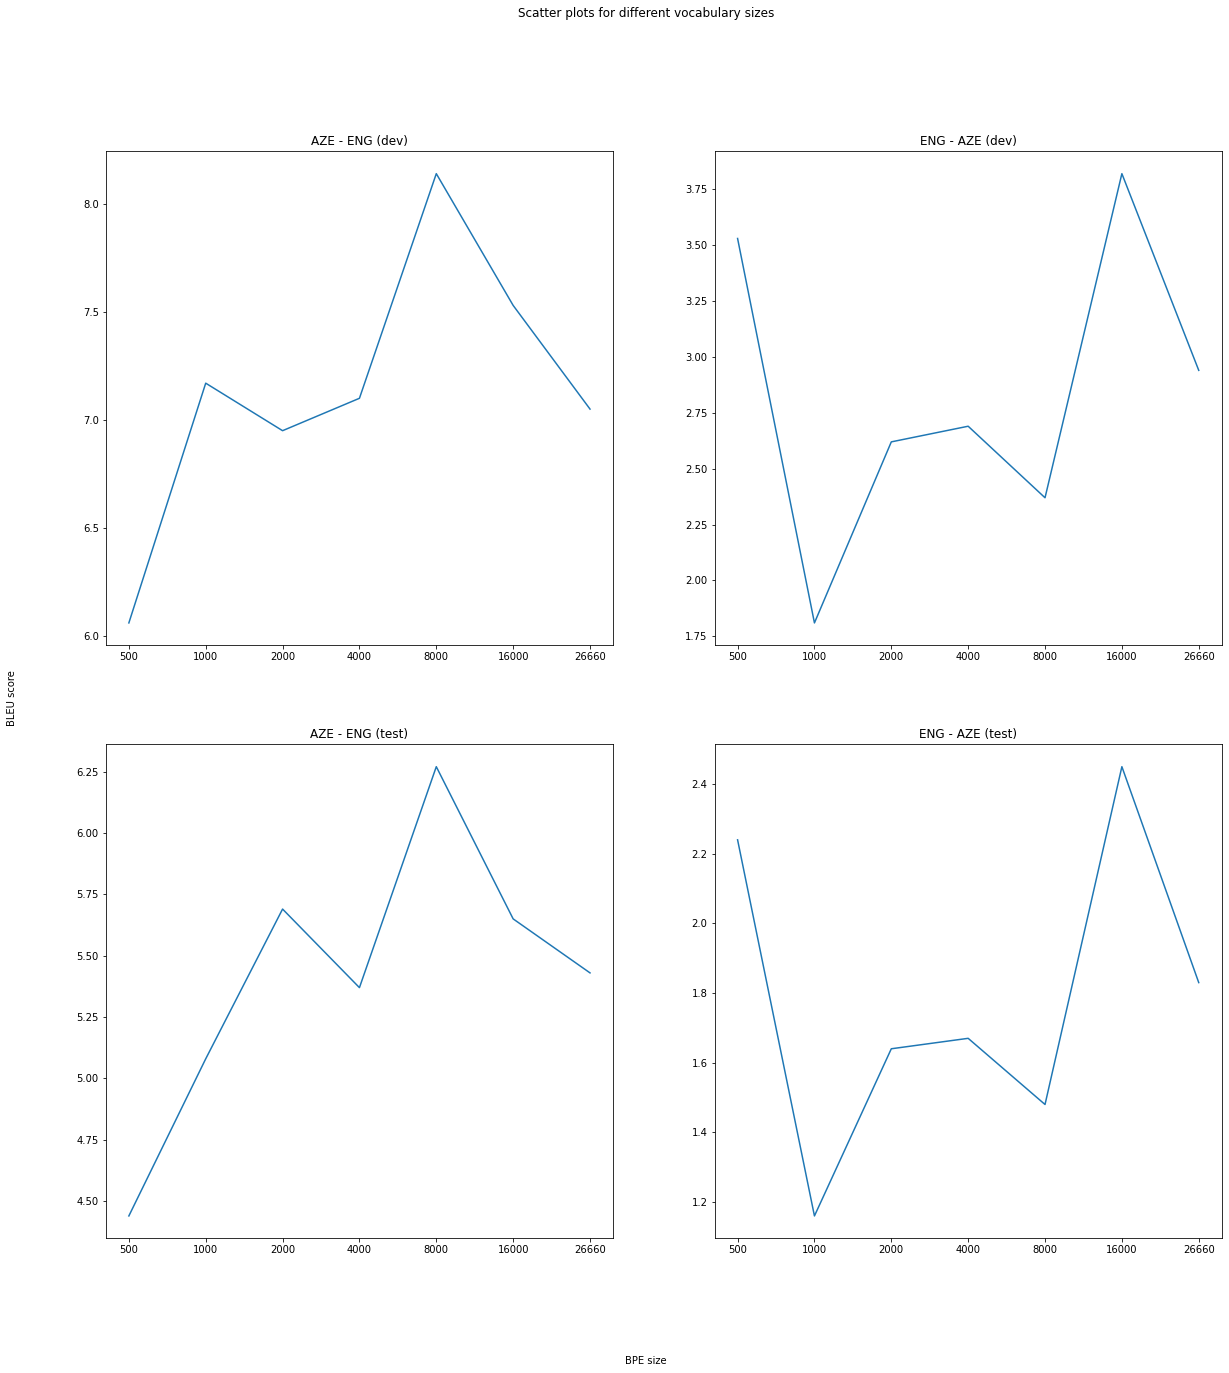

In [ ]:
import matplotlib.pyplot as plt

vocab_size = ['500','1000',"2000","4000","8000","16000",'26660']
results_dev_az_en  =  [6.06,7.17,6.95,7.10,8.14,7.53,7.05]
results_test_az_en  =  [4.44,5.08,5.69,5.37,6.27,5.65,5.43]
results_dev_en_az  =  [3.53,1.81,2.62,2.69,2.37,3.82,2.94]
results_test_en_az  =  [2.24,1.16,1.64,1.67,1.48,2.45,1.83]
fig, (ax1,ax2) = plt.subplots(2,2,figsize=(20, 20))
fig.suptitle('Scatter plots for different vocabulary sizes')
fig.text(0.5, 0.04, 'BPE size', ha='center', va='center')
fig.text(0.06, 0.5, 'BLEU score', ha='center', va='center', rotation='vertical')
ax1[0].plot(vocab_size, results_dev_az_en)
ax1[0].set_title('AZE - ENG (dev)')
ax1[1].plot(vocab_size, results_dev_en_az)
ax1[1].set_title('ENG - AZE (dev)')
ax2[0].plot(vocab_size, results_test_az_en)
ax2[0].set_title('AZE - ENG (test)')
ax2[1].plot(vocab_size, results_test_en_az)
ax2[1].set_title('ENG - AZE (test)')